
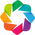

In [1]:
import ccxt
import datetime
import time
import holoviews as hv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output
from holoviews.operation.timeseries import rolling, rolling_outlier_std
from holoviews.streams import Stream
hv.notebook_extension('bokeh')
import matplotlib.pyplot as plt

# Importing data from POLONIEX

In [2]:
# Usamos a CCXT apenas para pegar a lista de moedas negociadas na exchange (POLONIEX)

exchange = ccxt.poloniex() # defino qual a exchange que vai ser analisada (No caso, vamos usar a POLONIEX)
markets = exchange.load_markets() # carrego todos os mercados que existem nessa exchange
mkt_keys = markets.keys() # lista todas as moedas negociadas na POLONIEX
mkt_keys=list(mkt_keys)

print('\033[1m'+'Lista de Moedas: ','\033[0m', mkt_keys, '\n')
print('\033[1m'+'Quantidade de Moedas: ','\033[0m', len(mkt_keys))

Lista de Moedas:   ['BCN/BTC', 'BELA/BTC', 'BLK/BTC', 'BTCD/BTC', 'Bitmark/BTC', 'BTS/BTC', 'BURST/BTC', 'CLAM/BTC', 'DASH/BTC', 'DGB/BTC', 'DOGE/BTC', 'EMC2/BTC', 'FLDC/BTC', 'FLO/BTC', 'GAME/BTC', 'GRC/BTC', 'HUC/BTC', 'LTC/BTC', 'MAID/BTC', 'OMNI/BTC', 'NAV/BTC', 'NEOS/BTC', 'NMC/BTC', 'NXT/BTC', 'PINK/BTC', 'POT/BTC', 'PPC/BTC', 'RIC/BTC', 'XLM/BTC', 'SYS/BTC', 'VIA/BTC', 'XVC/BTC', 'VRC/BTC', 'VTC/BTC', 'XBC/BTC', 'XCP/BTC', 'XEM/BTC', 'XMR/BTC', 'XPM/BTC', 'XRP/BTC', 'BTC/USDT', 'DASH/USDT', 'LTC/USDT', 'NXT/USDT', 'XLM/USDT', 'XMR/USDT', 'XRP/USDT', 'BCN/XMR', 'BLK/XMR', 'BTCD/XMR', 'DASH/XMR', 'LTC/XMR', 'MAID/XMR', 'NXT/XMR', 'ETH/BTC', 'ETH/USDT', 'SC/BTC', 'BCY/BTC', 'EXP/BTC', 'FCT/BTC', 'RADS/BTC', 'AMP/BTC', 'DCR/BTC', 'LSK/BTC', 'LSK/ETH', 'LBC/BTC', 'STEEM/BTC', 'STEEM/ETH', 'SBD/BTC', 'ETC/BTC', 'ETC/ETH', 'ETC/USDT', 'REP/BTC', 'REP/USDT', 'REP/ETH', 'ARDR/BTC', 'ZEC/BTC', 'ZEC/ETH', 'ZEC/USDT', 'ZEC/XMR', 'STRAT/BTC', 'NXC/BTC', 'PASC/BTC', 'GNT/BTC', 'GNT/ETH', 'GNO

In [3]:
curr_1 = input('Please, type the name of one currency from the list above:')

while curr_1 not in mkt_keys:
    #clear_output(True)
    curr_1 = input('Please, type the name of the currency \033[1mexactly\033[0m as it appears on the list above.')
    
curr_2 = input('Please, choose one more currency:')

while curr_2 == curr_1:
    curr_2 = input('Please, choose a different currency.')

while curr_2 not in mkt_keys:
    #clear_output(True)
    #print(curr_1, '\n')
    curr_2 = input('Please, type the name of one currency \033[1mexactly\033[0m as it appears on the list above.')
    
curr_3 = input('Choose one last currency.')

while curr_3 == curr_1 or curr_3 == curr_2:
    curr_3 = input('Please, choose a different currency.')
    
while curr_3 not in mkt_keys:
    #print(curr1, curr2, '\n')
    #clear_output(True)
    curr_3 = input('Please, type the name of one currency \033[1mexactly\033[0m as it appears on the list above.')

print('\nYou choose these currencies: \033[1m', curr_1, ', ', curr_2, ', ', curr_3, '.')

Please, type the name of one currency from the list above:BELA/BTC
Please, choose one more currency:OMG/ETH
Choose one last currency.NEOS/BTC

You choose these currencies:  BELA/BTC ,  OMG/ETH ,  NEOS/BTC .


In [4]:
list_of_curr = [curr_1, curr_2, curr_3]
list_of_curr

['BELA/BTC', 'OMG/ETH', 'NEOS/BTC']

In [5]:
import Poloniex_franklin # imports a list of functions that will be used forward in the analysis.

In [6]:
Poloniex_franklin.get_data(list_of_curr, '2014-01-01', '2018-01-29', 86400)

100% (3 of 3) |###########################| Elapsed Time: 0:00:07 Time: 0:00:07


 Download complete. Check your work directory. 


# Saving data downloaded into a SQL database

In [7]:
# Importing packages needed to work with SQL databases

import sqlite3
import pymysql as psql
import pandas.io.sql as psql
from sqlite3 import Error
import pymysql

In [8]:
data = Poloniex_franklin.call_data(list_of_curr)

In [9]:
data.head()

,close,high,low,open,quoteVolume,volume,weightedAverage,currency
date,,,,,,,,
2014-05-14,0.000006,0.000019,0.000004,0.000019,169578.918534,1.302583,0.000008,BTC_BELA
2014-05-15,0.000003,0.000008,0.000002,0.000006,91171.016477,0.376990,0.000004,BTC_BELA
2014-05-16,0.000003,0.000004,0.000003,0.000003,18962.729506,0.057466,0.000003,BTC_BELA
2014-05-17,0.000004,0.000005,0.000001,0.000003,54782.186137,0.164225,0.000003,BTC_BELA
2014-05-18,0.000007,0.000008,0.000002,0.000002,93892.003065,0.547664,0.000006,BTC_BELA


In [10]:
data.tail()

,close,high,low,open,quoteVolume,volume,weightedAverage,currency
date,,,,,,,,
2018-01-25,0.000781,0.000792,0.000734,0.000756,17844.874996,13.788530,0.000773,BTC_NEOS
2018-01-26,0.000729,0.000789,0.000702,0.000789,24030.797050,17.764817,0.000739,BTC_NEOS
2018-01-27,0.000724,0.000730,0.000710,0.000725,4908.454636,3.528699,0.000719,BTC_NEOS
2018-01-28,0.000760,0.000796,0.000719,0.000719,13310.821548,10.085786,0.000758,BTC_NEOS
2018-01-29,0.000744,0.000778,0.000740,0.000758,12442.035546,9.418414,0.000757,BTC_NEOS


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 2014-05-14 to 2018-01-29
Data columns (total 8 columns):
close              2736 non-null float64
high               2736 non-null float64
low                2736 non-null float64
open               2736 non-null float64
quoteVolume        2736 non-null float64
volume             2736 non-null float64
weightedAverage    2736 non-null float64
currency           2736 non-null object
dtypes: float64(7), object(1)
memory usage: 192.4+ KB


In [12]:
Poloniex_franklin.data_to_sql(data, 'Base')

In [13]:
connection = sqlite3.connect('Base.db') # creates a connection with the database
cur = connection.cursor() # starts a cursor

# Visualizations

### 1st Graph: Series in level.

In [14]:
# Prepare the label to each series

moeda = curr_1.split('/')
moeda.reverse()
moeda1 = str(moeda[0]+'_'+moeda[1])

moeda = curr_2.split('/')
moeda.reverse()
moeda2 = str(moeda[0]+'_'+moeda[1])

moeda = curr_3.split('/')
moeda.reverse()
moeda3 = str(moeda[0]+'_'+moeda[1])

print(moeda1,moeda2,moeda3)

BTC_BELA ETH_OMG BTC_NEOS


In [22]:
# preloads the database to feed the graphs.

dados_moeda1 = pd.read_sql_query('select date,close from Base WHERE currency like "{}"'.format(moeda1), connection)
dados_moeda1.set_index('date', inplace=True)
dados_moeda1['{}'.format(moeda1)]=dados_moeda1['close']


dados_moeda2 = pd.read_sql_query('select date,close from Base WHERE currency like "{}"'.format(moeda2), connection)
dados_moeda2['{}'.format(moeda2)]=dados_moeda2['close']
dados_moeda2.set_index('date', inplace=True)

dados_moeda3 = pd.read_sql_query('select date,close from Base WHERE currency like "{}"'.format(moeda3), connection)
dados_moeda3['{}'.format(moeda3)]=dados_moeda3['close']
dados_moeda3.set_index('date', inplace=True)

lista = [dados_moeda1, dados_moeda2, dados_moeda3]
dados_graf = pd.concat(lista, axis=1)


In [16]:
dados_graf.head()


,close,BTC_BELA,close,ETH_OMG,close,BTC_NEOS
2014-05-14,0.000006,0.000006,NaN,NaN,NaN,NaN
2014-05-15,0.000003,0.000003,NaN,NaN,NaN,NaN
2014-05-16,0.000003,0.000003,NaN,NaN,NaN,NaN
2014-05-17,0.000004,0.000004,NaN,NaN,NaN,NaN
2014-05-18,0.000007,0.000007,NaN,NaN,NaN,NaN


In [23]:
def load_symbol(symbol, **kwargs):
   
    df=data[symbol]
    df['date'] = df.index
     
    return hv.Curve(df, ('date', 'Date'), ('close', 'Close price'))


stock_symbols = ['{}'.format(moeda1),'{}'.format(moeda2) ,'{}'.format(moeda3)]
data = {'{}'.format(moeda1):dados_moeda1.iloc[-100:],'{}'.format(moeda2):dados_moeda2.iloc[-100:],'{}'.format(moeda3):dados_moeda3[-100:]}
dmap = hv.DynamicMap(load_symbol, kdims='Symbol').redim.values(Symbol=stock_symbols)

In [24]:
%%opts Curve [width=700 tools=['hover']] {+framewise} 
dmap

:DynamicMap   [Symbol]

### 2nd  Graph:  Volatility

In [25]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
def rolling_vol(w, symbol):
    dt = dados_graf
    S = dados_graf['{}'.format(symbol)].rolling(w).std()
    dt['Volatility'] = S
    dt['date'] = dados_graf.index

    return hv.Curve(dt.iloc[-2000:], ('date', 'Date'), ('Volatility','Rolling volatility'))

stock_symbols = ['{}'.format(moeda1), '{}'.format(moeda2),'{}'.format(moeda3)]
data = {"{}".format(moeda1): dados_moeda1, '{}'.format(moeda2):dados_moeda2}    
winsize = range(10,60,2)
rvol = hv.DynamicMap(rolling_vol, kdims=['Wsize', 'Symbol']).redim.values(Symbol=stock_symbols).redim.range(Wsize=(10,60))
rvol

:DynamicMap   [Wsize,Symbol]

### 3rd Graph: Daily Returns

In [26]:
# import needed modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
dados_moeda = [dados_moeda1, dados_moeda2, dados_moeda3]
dados_moeda = pd.concat(dados_moeda, axis=1, join='outer')
del dados_moeda['close']
dados_moeda.tail()

,BTC_BELA,ETH_OMG,BTC_NEOS
2018-01-25,0.000023,0.017095,0.000781
2018-01-26,0.000025,0.015587,0.000729
2018-01-27,0.000028,0.014611,0.000724
2018-01-28,0.000027,0.013820,0.000760
2018-01-29,0.000026,0.014393,0.000744


In [28]:
returns_crypto = dados_moeda.pct_change()

In [29]:
returns_crypto.tail()

,BTC_BELA,ETH_OMG,BTC_NEOS
2018-01-25,-0.032944,0.002007,0.029310
2018-01-26,0.076757,-0.088223,-0.066694
2018-01-27,0.121346,-0.062579,-0.006791
2018-01-28,-0.032143,-0.054158,0.049738
2018-01-29,-0.040590,0.041479,-0.021342


In [30]:
returns_graph = returns_crypto
returns_graph['date'] = returns_crypto.index

In [31]:
returns_graph.tail()

,BTC_BELA,ETH_OMG,BTC_NEOS,date
2018-01-25,-0.032944,0.002007,0.029310,2018-01-25
2018-01-26,0.076757,-0.088223,-0.066694,2018-01-26
2018-01-27,0.121346,-0.062579,-0.006791,2018-01-27
2018-01-28,-0.032143,-0.054158,0.049738,2018-01-28
2018-01-29,-0.040590,0.041479,-0.021342,2018-01-29


In [32]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
p = hv.Curve(returns_graph[-10000:], ('date', 'Date'),('{}'.format(moeda1), 'daily Return rate'), label='{} returns'.format(moeda1)).hist(num_bins=150)
p 


:AdjointLayout
   :Curve   [date]   (BTC_BELA)
   :Histogram   [BTC_BELA]   (BTC_BELA_frequency)

In [33]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
p = hv.Curve(returns_graph[-10000:], ('date', 'Date'),('{}'.format(moeda2), 'daily Return rate'), label='{} returns'.format(moeda2)).hist(num_bins=150)
p 

:AdjointLayout
   :Curve   [date]   (ETH_OMG)
   :Histogram   [ETH_OMG]   (ETH_OMG_frequency)

In [29]:
%%opts Curve [width=700, height=500, show_grid=True] {+framewise}
p = hv.Curve(returns_graph[-10000:], ('date', 'Date'),('{}'.format(moeda3), 'daily Return rate'), label='{} returns'.format(moeda3)).hist(num_bins=150)
p 

:AdjointLayout
   :Curve   [date]   (USDT_NXT)
   :Histogram   [USDT_NXT]   (USDT_NXT_frequency)

### 4th Graph: Scatter Plot

Choose 2 currencies (suggestion: BELA/BTC and ETH/OMG)


In [34]:
list_of_curr

['BELA/BTC', 'OMG/ETH', 'NEOS/BTC']

In [35]:
x = input('Please choose one currency for scatter plotting.')

while x not in list_of_curr:
    x = input('Please, choose one from the list above and make sure you write its name correctly.')

y = input('Please, choose one more currency for scatter plotting.')

while y not in list_of_curr:
    y = input('Please, choose one from the list above and make sure you write its name correctly.')
              
x1=x.split('/')
x1.reverse()
x=str(x1[0]+'_'+x1[1])
              
y1=y.split('/')
y1.reverse()
y=str(y1[0]+'_'+y1[1])

Please choose one currency for scatter plotting.
Please, choose one from the list above and make sure you write its name correctly.BELA/BTC
Please, choose one more currency for scatter plotting.OMG/ETH


In [36]:
%%opts Scatter [width=700, height=500, show_grid=True] {+framewise}
%%opts Curve (color='red' line_width=1.5)
c = hv.Curve((np.arange(-.1,.1,.01),np.arange(-.1,.1,.01)),str(x), str(y))
s = hv.Scatter((returns_graph['{}'.format(x)][-1300:],returns_graph['{}'.format(y)][-1300:]),kdims=[x], vdims=[y]).redim.range(ETH=(-.1,.1),BTC=(-.1,.1)).hist(num_bins=150, dimension=[str(x),str(y)])
c*s

:AdjointLayout
   :Overlay
      .Curve.I   :Curve   [BTC_BELA]   (ETH_OMG)
      .Scatter.I :Scatter   [BTC_BELA]   (ETH_OMG)
   :Histogram   [ETH_OMG]   (ETH_OMG_frequency)
   :Histogram   [BTC_BELA]   (BTC_BELA_frequency)

# Portfolio Analysis

In [37]:
returns_crypto.tail() # shows again the daily returns of the three crypto currencies selected.

,BTC_BELA,ETH_OMG,BTC_NEOS,date
2018-01-25,-0.032944,0.002007,0.029310,2018-01-25
2018-01-26,0.076757,-0.088223,-0.066694,2018-01-26
2018-01-27,0.121346,-0.062579,-0.006791,2018-01-27
2018-01-28,-0.032143,-0.054158,0.049738,2018-01-28
2018-01-29,-0.040590,0.041479,-0.021342,2018-01-29


In [38]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# makes a list with the three selected cryptocurrencies 

selected = ['{}'.format(moeda1), '{}'.format(moeda2), '{}'.format(moeda3)]

# calculate daily and annual returns of the cryptocurrencies

returns_daily = returns_crypto
returns_annual = returns_daily.mean() * 365

# get daily and covariance of returns of the cryptocurrencies
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 365

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]



In [40]:
df.head()

,Returns,Volatility,BTC_BELA Weight,ETH_OMG Weight,BTC_NEOS Weight
0,8.459538,4.734576,0.590375,0.208042,0.201584
1,3.862685,2.981668,0.118374,0.395116,0.486510
2,4.873079,2.916595,0.277583,0.396384,0.326033
3,7.070642,3.820268,0.336784,0.179749,0.483466
4,0.888111,1.714987,0.180668,0.797198,0.022134


### 5th Graph: Eficcient Frontier

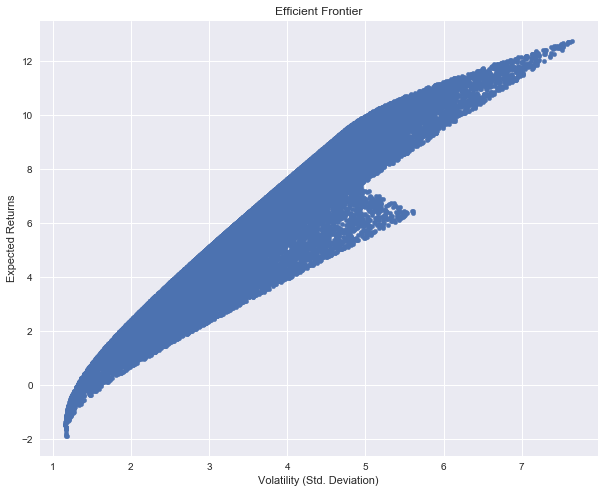

In [41]:
# plot the efficient frontier with a scatter plot

plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [42]:
# calculate daily and annual returns of the stocks
returns_daily = returns_crypto
returns_annual = returns_daily.mean() * 365

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 365

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

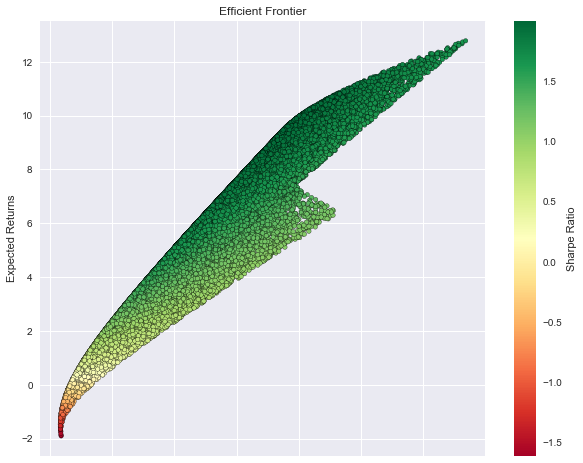

In [43]:
# plot frontier, max sharpe & min Volatility values with a scatterplot

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()


Calculating minimum volatility and maximum Sharpe ratio portfolios...

In [44]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

#### Efficient frontier with minimum variance and maximum Sharpe ratio portfolios

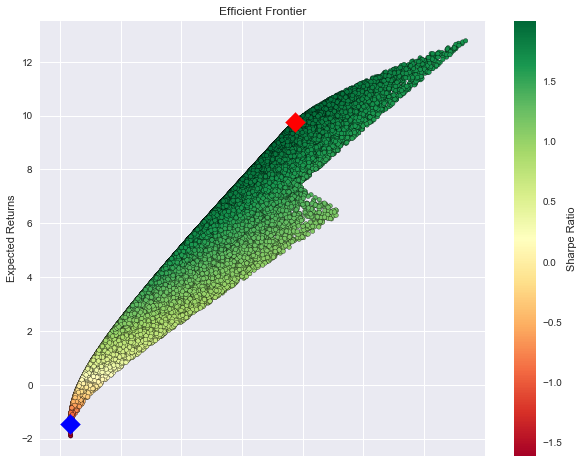

In [45]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

#### Bonus: Plotting portfolio weights

In [47]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                    43577
Returns         -1.472210
Volatility       1.162885
Sharpe Ratio    -1.265998
BTC_BELA Weight  0.017411
ETH_OMG Weight   0.953705
BTC_NEOS Weight  0.028884
                    29568
Returns          9.746274
Volatility       4.876481
Sharpe Ratio     1.998629
BTC_BELA Weight  0.519598
ETH_OMG Weight   0.000613
BTC_NEOS Weight  0.479789


Weights of the minimum variance portfolio:

In [48]:
min_var = pd.DataFrame(min_variance_port,dtype='float')
weights_min_var = min_var.iloc[0][['{} Weight'.format(moeda1), '{} Weight'.format(moeda2), '{} Weight'.format(moeda3)]]

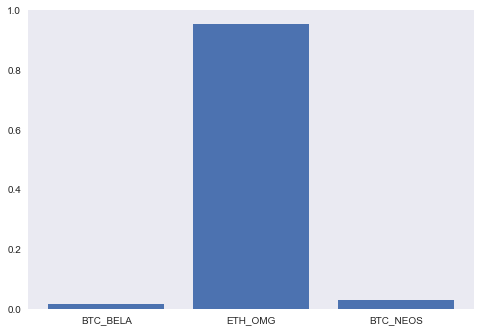

In [49]:
x = np.arange(3)
weights = weights_min_var[0:3]

fig, ax = plt.subplots()
plt.bar(x, weights)
plt.xticks(x, ('{}'.format(moeda1), '{}'.format(moeda2), '{}'.format(moeda3)))
plt.show()

Weights of the Sharpe Portfolio:

p.s.: Risk-free rate is considered to be zero.

In [50]:
sharpe = pd.DataFrame(sharpe_portfolio,dtype='float')
weights_sharpe = sharpe.iloc[0][['{} Weight'.format(moeda1), '{} Weight'.format(moeda2), '{} Weight'.format(moeda3)]]

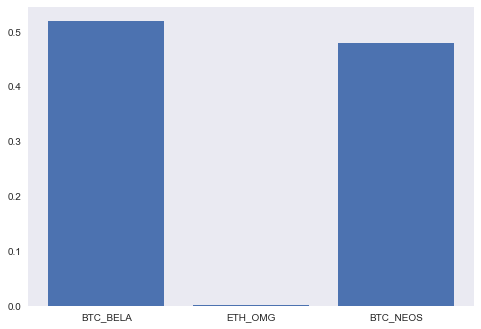

In [51]:
x = np.arange(3)
weights = weights_sharpe[0:3]

fig, ax = plt.subplots()
plt.bar(x, weights)
plt.xticks(x, ('{}'.format(moeda1), '{}'.format(moeda2), '{}'.format(moeda3)))
plt.show()